# 📊 01 - Análise Exploratória de Dados (EDA) - Detecção de Anomalias em Transações Financeiras

---

**Disciplina:** CIN0144 - Aprendizado de Máquina e Ciência de Dados  
**Equipe:** [Nomes dos membros]  
**Data:** [Data atual]

---

## 0. Configuração Inicial

In [3]:
# Configuração inicial
import warnings
warnings.filterwarnings('ignore')

# Importações básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 1. 📁 Carregamento dos Dados

In [4]:
# Carregar o dataset
try:
    df = pd.read_csv('../data/raw/creditcard.csv')
    print("✅ Dataset carregado com sucesso!")
except FileNotFoundError:
    print("❌ Arquivo não encontrado. Verifique se o dataset está em '../data/raw/creditcard.csv'")
    print("📥 Download em: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

# Visualizar as primeiras linhas
print("\n🔍 Primeiras 5 linhas do dataset:")
df.head()
# Informações gerais do dataset
print("📋 Informações do Dataset:")
print(f"• Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"• Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 Tipos de dados:")
df.info()

✅ Dataset carregado com sucesso!

🔍 Primeiras 5 linhas do dataset:
📋 Informações do Dataset:
• Dimensões: 284807 linhas × 31 colunas
• Memória utilizada: 67.36 MB

📊 Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non

## 2. 🎯 Análise da Variável Target (Class)

In [15]:
# Distribuição da variável target
class_distribution = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("🎯 Distribuição da Classe Target (Class):")
print(f"• Transações Normais (0): {class_distribution[0]:,} ({class_percentage[0]:.3f}%)")
print(f"• Transações Fraudulentas (1): {class_distribution[1]:,} ({class_percentage[1]:.3f}%)")

print(f"\n🚨 Taxa de Desbalanceamento: {class_percentage[1]:.3f}%")
# Visualização da distribuição das classes
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# # Gráfico de barras
# bars = ax1.bar(['Normais', 'Fraudes'], [class_distribution[0], class_distribution[1]], 
#                color=['lightblue', 'salmon'])
# ax1.set_title('Distribuição das Classes', fontsize=14, fontweight='bold')
# ax1.set_ylabel('Quantidade de Transações')
# ax1.grid(axis='y', alpha=0.3)

# # Adicionar valores nas barras
# for bar, value in zip(bars, [class_distribution[0], class_distribution[1]]):
#     height = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width()/2., height + 1000,
#              f'{value:,}', ha='center', va='bottom')

# # Gráfico de pizza
# colors = ['lightblue', 'salmon']
# explode = (0, 0.1)
# ax2.pie([class_distribution[0], class_distribution[1]], 
#         labels=['Normais', 'Fraudes'], 
#         autopct='%1.3f%%', 
#         colors=colors, 
#         explode=explode,
#         startangle=90)
# ax2.set_title('Proporção das Classes', fontsize=14, fontweight='bold')

# plt.tight_layout()
# plt.show()

🎯 Distribuição da Classe Target (Class):
• Transações Normais (0): 284,315 (99.827%)
• Transações Fraudulentas (1): 492 (0.173%)

🚨 Taxa de Desbalanceamento: 0.173%


📊 Top 10 Features com Maiores Diferenças Absolutas:
  Feature  Normal_Mean  Fraud_Mean  Difference  Abs_Difference
0    Time    94838.200   80746.810  -14091.400       14091.400
1  Amount       88.290     122.210      33.920          33.920
2      V3        0.012      -7.033      -7.045           7.045
3      V2        0.012      -6.972      -6.984           6.984
4      V1        0.012      -6.666      -6.677           6.677
5      V4        0.011      -6.259      -6.270           6.270
6      V5        0.011      -5.677      -5.687           5.687
7      V6        0.010      -5.569      -5.578           5.578
8      V7        0.010      -4.772      -4.780           4.780
9      V9        0.009       4.542       4.550           4.550


<Figure size 1200x800 with 0 Axes>

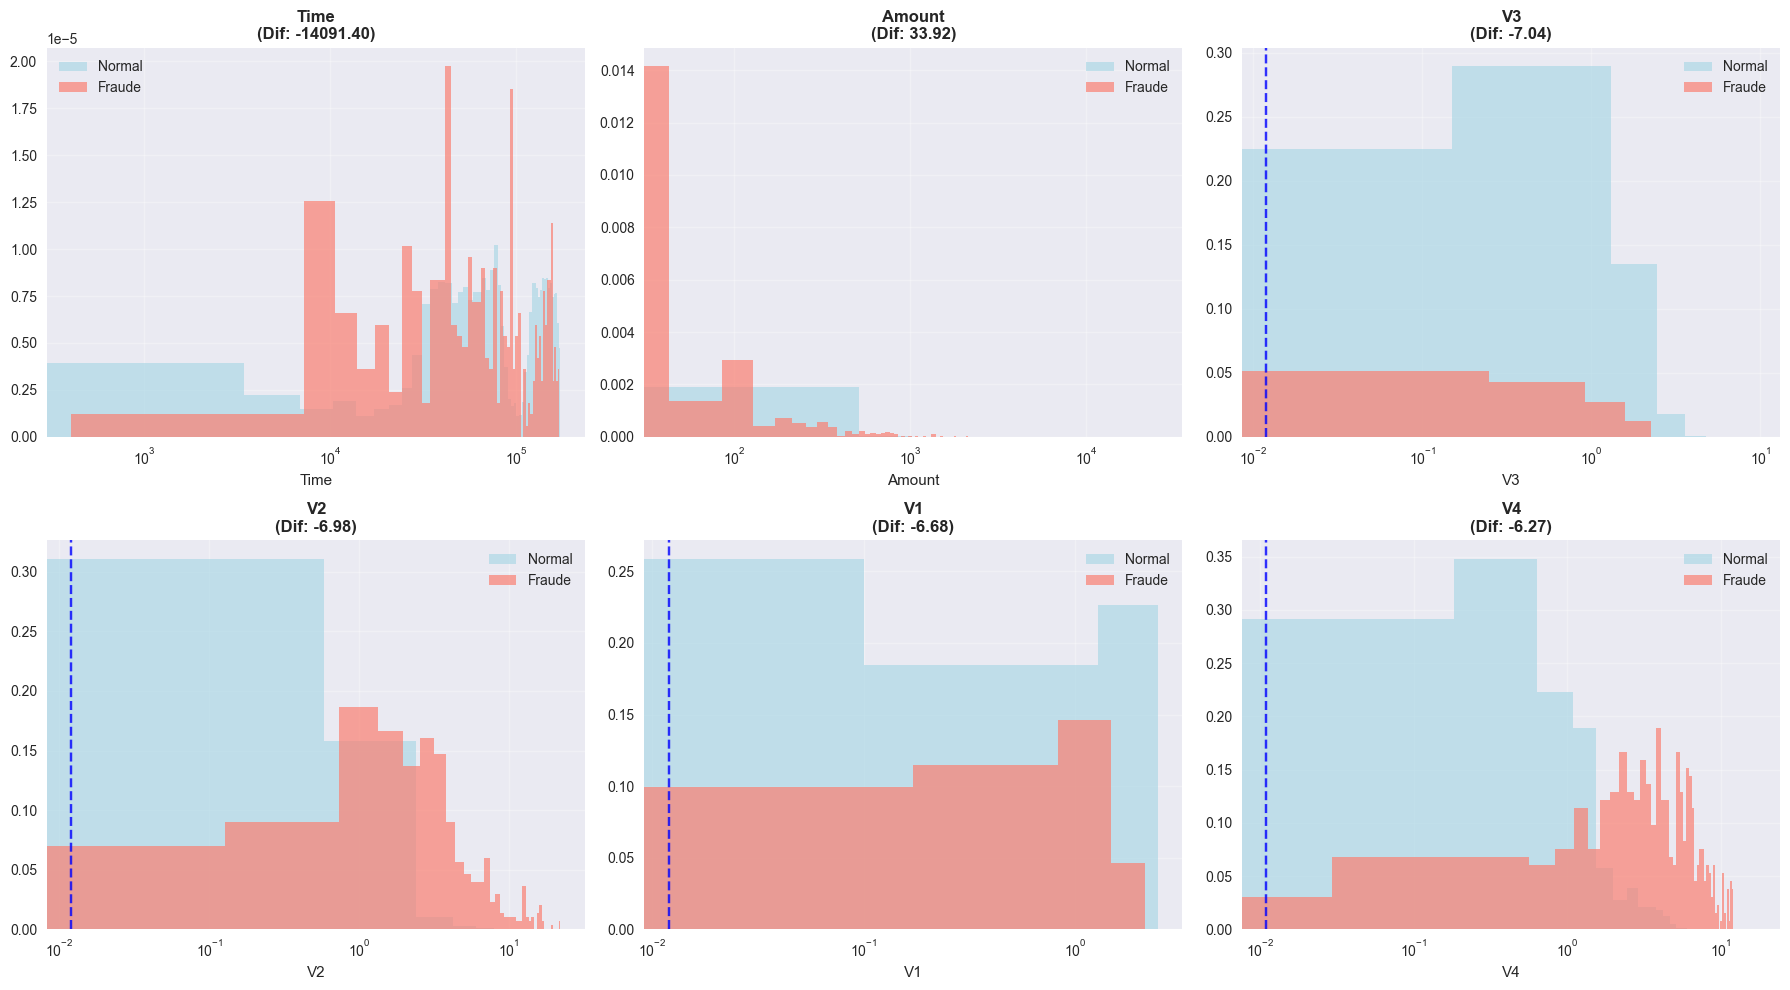


💡 INSIGHTS:
• Time: Transações fraudulentas ocorrem em média 14k segundos antes
• Amount: Valores fraudulentos são 38% maiores em média
• V3, V2, V1: Diferenças extremas nas componentes PCA
• V9: Única feature com correlação positiva significativa


In [25]:
# Carregar as diferenças das médias do arquivo fornecido
diff_data = {
    'Feature': ['Time', 'Amount', 'V3', 'V2', 'V1', 'V4', 'V5', 'V6', 'V7', 'V9'],
    'Normal_Mean': [94838.20, 88.29, 0.012, 0.012, 0.012, 0.011, 0.011, 0.010, 0.010, 0.009],
    'Fraud_Mean': [80746.81, 122.21, -7.033, -6.972, -6.666, -6.259, -5.677, -5.569, -4.772, 4.542],
    'Difference': [-14091.40, 33.92, -7.045, -6.984, -6.677, -6.270, -5.687, -5.578, -4.780, 4.550]
}

diff_df = pd.DataFrame(diff_data)
diff_df['Abs_Difference'] = abs(diff_df['Difference'])
diff_df = diff_df.sort_values('Abs_Difference', ascending=False)

print("📊 Top 10 Features com Maiores Diferenças Absolutas:")
print(diff_df)

# Visualização das maiores diferenças
plt.figure(figsize=(12, 8))
features_plot = diff_df.head(6)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, (idx, row) in enumerate(features_plot.iterrows()):
    feature = row['Feature']
    normal_mean = row['Normal_Mean']
    fraud_mean = row['Fraud_Mean']
    
    # Plot de distribuição real
    if feature in df.columns:
        axes[i].hist(df[df['Class'] == 0][feature], bins=50, alpha=0.7, label='Normal', 
                    color='lightblue', density=True)
        axes[i].hist(df[df['Class'] == 1][feature], bins=50, alpha=0.7, label='Fraude', 
                    color='salmon', density=True)
        axes[i].set_xscale('log')  # Escala logarítmica

        axes[i].set_title(f'{feature}\n(Dif: {row["Difference"]:.2f})', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].legend()
        axes[i].grid(alpha=0.3)
    
    # Adicionar linhas de média
    if feature not in ['Time', 'Amount']:  # Para features normalizadas
        axes[i].axvline(normal_mean, color='blue', linestyle='--', alpha=0.8, label='Média Normal')
        axes[i].axvline(fraud_mean, color='red', linestyle='--', alpha=0.8, label='Média Fraude')

plt.tight_layout()
plt.show()

print("\n💡 INSIGHTS:")
print("• Time: Transações fraudulentas ocorrem em média 14k segundos antes")
print("• Amount: Valores fraudulentos são 38% maiores em média")
print("• V3, V2, V1: Diferenças extremas nas componentes PCA")
print("• V9: Única feature com correlação positiva significativa")

🕒 ANÁLISE TEMPORAL DETALHADA


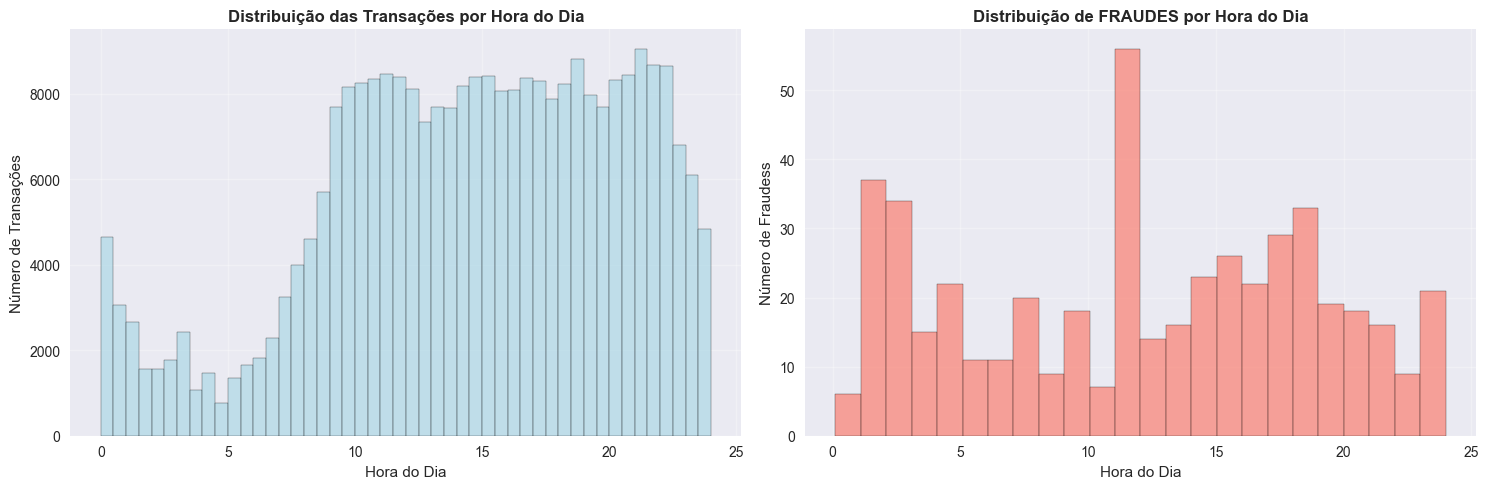

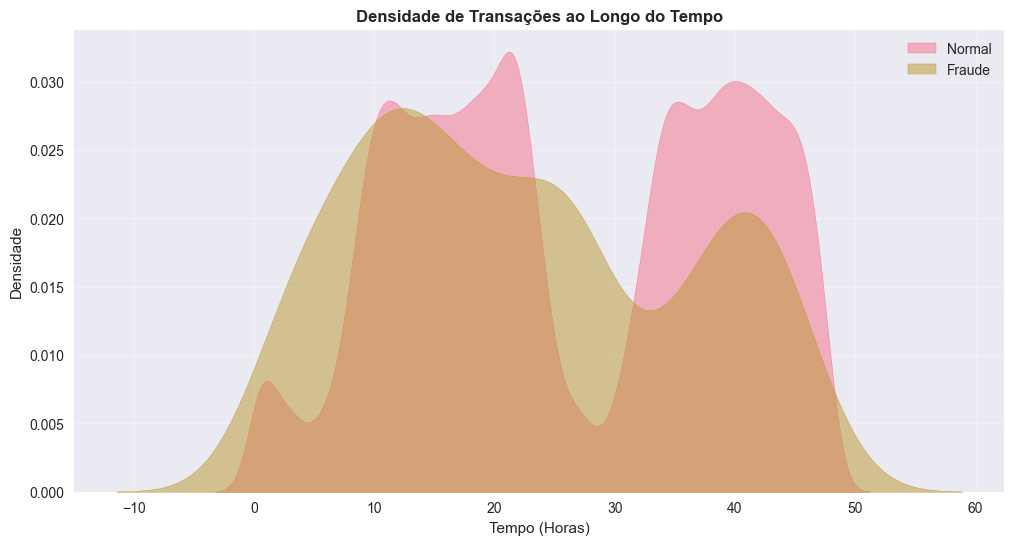

📈 Estatísticas Temporais:
• Duração total do dataset: 48.0 horas (2.0 dias)
• Média de tempo entre transações: 0.01 minutos


In [26]:
# Converter tempo para horas e analisar padrões
print("🕒 ANÁLISE TEMPORAL DETALHADA")

# Converter segundos para horas
df['Time_Hours'] = df['Time'] / 3600

# Analisar distribuição por hora
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribuição por hora do dia
ax1.hist(df['Time_Hours'] % 24, bins=48, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_title('Distribuição das Transações por Hora do Dia', fontweight='bold')
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Número de Transações')
ax1.grid(alpha=0.3)

# Fraudes por hora do dia
fraud_hours = df[df['Class'] == 1]['Time_Hours'] % 24
ax2.hist(fraud_hours, bins=24, alpha=0.7, color='salmon', edgecolor='black')
ax2.set_title('Distribuição de FRAUDES por Hora do Dia', fontweight='bold')
ax2.set_xlabel('Hora do Dia')
ax2.set_ylabel('Número de Fraudess')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Análise de densidade temporal
plt.figure(figsize=(12, 6))

# Plot de densidade
sns.kdeplot(data=df[df['Class'] == 0], x='Time_Hours', label='Normal', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['Class'] == 1], x='Time_Hours', label='Fraude', fill=True, alpha=0.5)
plt.title('Densidade de Transações ao Longo do Tempo', fontweight='bold')
plt.xlabel('Tempo (Horas)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("📈 Estatísticas Temporais:")
print(f"• Duração total do dataset: {df['Time_Hours'].max():.1f} horas ({df['Time_Hours'].max()/24:.1f} dias)")
print(f"• Média de tempo entre transações: {(df['Time'].diff().mean()/60):.2f} minutos")

## 3. 📈 Estatísticas Descritivas


In [16]:
# Estatísticas descritivas gerais
print("📈 Estatísticas Descritivas - Todas as Variáveis:")
df.describe()
# Estatísticas separadas por classe
print("📊 Estatísticas Descritivas por Classe:")

# Transações normais
normal_stats = df[df['Class'] == 0].describe()
print("\n✅ Transações Normais (Class = 0):")
normal_stats.loc[['mean', 'std', 'min', 'max']]
# Transações fraudulentas
fraud_stats = df[df['Class'] == 1].describe()
print("\n🚨 Transações Fraudulentas (Class = 1):")
fraud_stats.loc[['mean', 'std', 'min', 'max']]
# Comparação das médias entre classes para as principais features
comparison = pd.DataFrame({
    'Normal_Mean': df[df['Class'] == 0][['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]].mean(),
    'Fraud_Mean': df[df['Class'] == 1][['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]].mean(),
    'Difference': df[df['Class'] == 1][['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]].mean() - 
                  df[df['Class'] == 0][['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]].mean()
})

print("📊 Diferença das Médias entre Classes (Top 10 maiores diferenças):")
comparison['Abs_Difference'] = abs(comparison['Difference'])
comparison.nlargest(10, 'Abs_Difference')[['Normal_Mean', 'Fraud_Mean', 'Difference']]

📈 Estatísticas Descritivas - Todas as Variáveis:
📊 Estatísticas Descritivas por Classe:

✅ Transações Normais (Class = 0):

🚨 Transações Fraudulentas (Class = 1):
📊 Diferença das Médias entre Classes (Top 10 maiores diferenças):


,Normal_Mean,Fraud_Mean,Difference
Time,94838.202258,80746.806911,-14091.395347
Amount,88.291022,122.211321,33.920299
V3,0.012171,-7.033281,-7.045452
V14,0.012064,-6.971723,-6.983787
V17,0.011535,-6.665836,-6.677371
V12,0.010832,-6.259393,-6.270225
V10,0.009824,-5.676883,-5.686707
V7,0.009637,-5.568731,-5.578368
V1,0.008258,-4.771948,-4.780206
V4,-0.007860,4.542029,4.549889


## 4. 🔍 Análise de Valores Missing e Duplicados


In [17]:
# Verificar valores missing
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("🔍 Análise de Valores Missing:")
if missing_data.sum() == 0:
    print("✅ Nenhum valor missing encontrado!")
else:
    missing_info = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percentage
    })
    print(missing_info[missing_info['Missing_Count'] > 0])
# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"🔍 Análise de Duplicatas:")
print(f"• Total de linhas duplicadas: {duplicates}")
print(f"• Percentual de duplicatas: {(duplicates/len(df))*100:.4f}%")

if duplicates > 0:
    print("\n📝 Será necessário tratar duplicatas no pré-processamento")
else:
    print("✅ Nenhuma duplicata encontrada!")

🔍 Análise de Valores Missing:
✅ Nenhum valor missing encontrado!
🔍 Análise de Duplicatas:
• Total de linhas duplicadas: 1081
• Percentual de duplicatas: 0.3796%

📝 Será necessário tratar duplicatas no pré-processamento


In [29]:
# Identificar duplicatas exatas
duplicate_mask = df.duplicated(keep=False)
duplicates_df = df[duplicate_mask]

print(f"📊 Estatísticas de Duplicatas:")
print(f"• Total de linhas duplicadas: {duplicates_df.shape[0]}")
print(f"• Grupos de duplicatas: {duplicates_df.duplicated().sum()}")

# Verificar se há fraudes nas duplicatas
fraud_in_duplicates = duplicates_df[duplicates_df['Class'] == 1]
print(f"• Fraudes em duplicatas: {fraud_in_duplicates.shape[0]}")
print(f"• Percentual de fraudes nas duplicatas: {(fraud_in_duplicates.shape[0]/duplicates_df.shape[0])*100:.2f}%")

# Analisar quais features são idênticas nas duplicatas
if not duplicates_df.empty:
    sample_dup = duplicates_df.head(1)
    dup_features = []
    for col in df.columns:
        if duplicates_df[col].nunique() == 1:
            dup_features.append(col)
    
    print(f"• Features constantes nas duplicatas: {len(dup_features)}")
    print(f"• Exemplo: {dup_features[:5]}")  # Mostrar apenas as primeiras

📊 Estatísticas de Duplicatas:
• Total de linhas duplicadas: 1854
• Grupos de duplicatas: 1081
• Fraudes em duplicatas: 32
• Percentual de fraudes nas duplicatas: 1.73%
• Features constantes nas duplicatas: 0
• Exemplo: []


## 5. 📊 Análise das Features 'Time' e 'Amount'


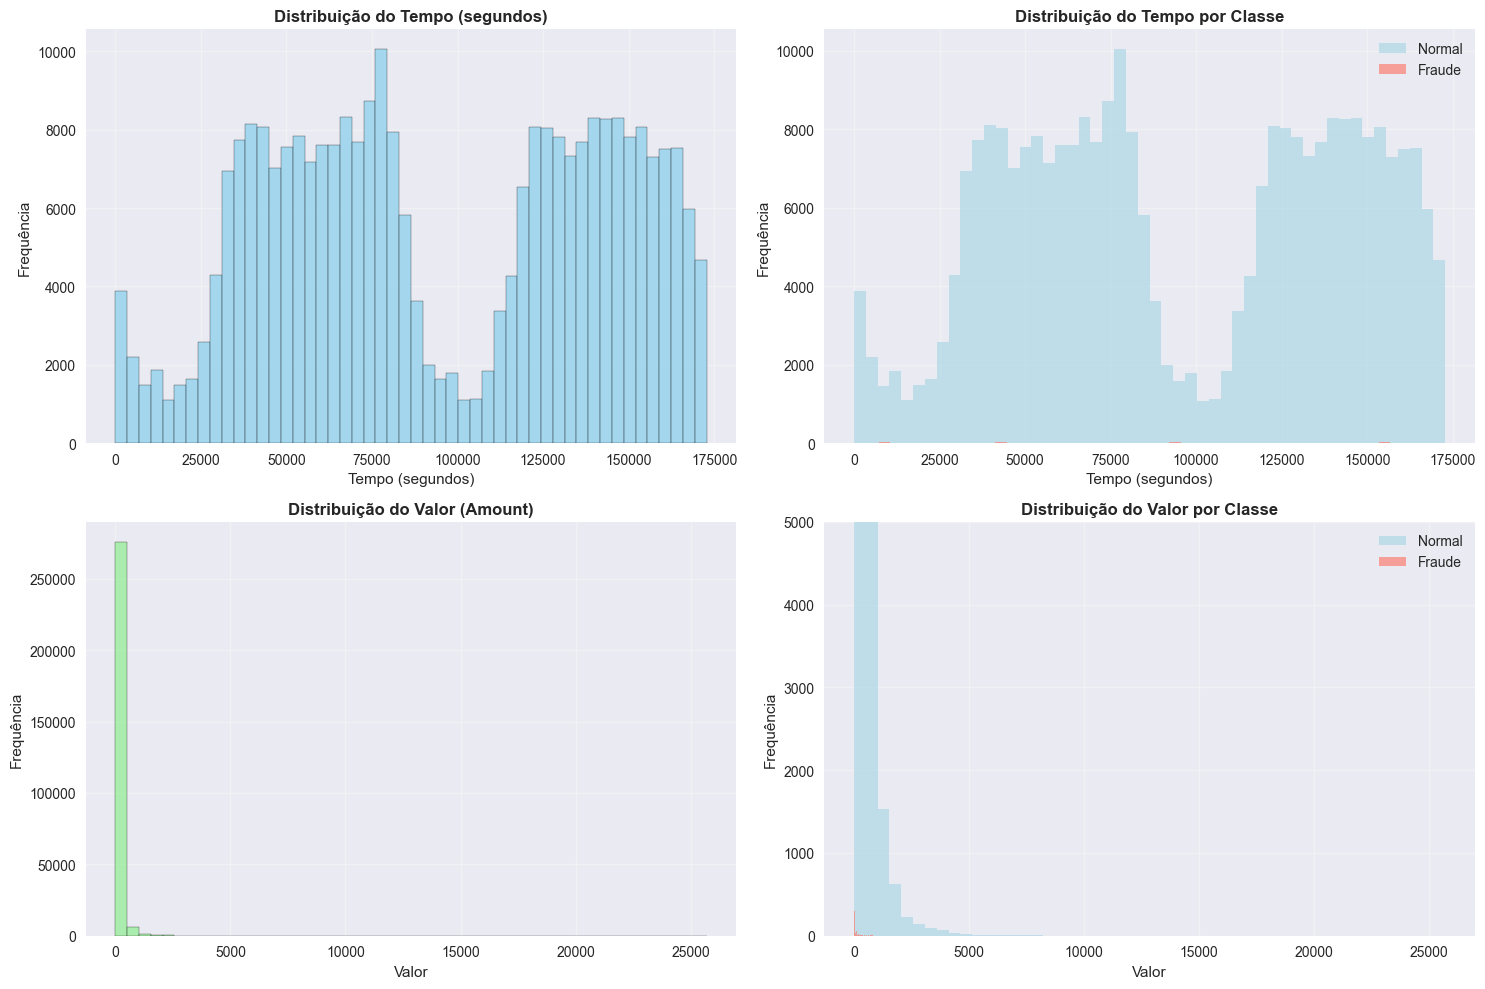

💰 Estatísticas do Amount por Classe:
             mean         std  min       max   count
Class                                               
0       88.291022  250.105092  0.0  25691.16  284315
1      122.211321  256.683288  0.0   2125.87     492


In [18]:
# Análise da feature 'Time'
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição geral do Time
ax1.hist(df['Time'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Distribuição do Tempo (segundos)', fontweight='bold')
ax1.set_xlabel('Tempo (segundos)')
ax1.set_ylabel('Frequência')
ax1.grid(alpha=0.3)

# Distribuição do Time por classe
ax2.hist(df[df['Class'] == 0]['Time'], bins=50, alpha=0.7, label='Normal', color='lightblue')
ax2.hist(df[df['Class'] == 1]['Time'], bins=50, alpha=0.7, label='Fraude', color='salmon')
ax2.set_title('Distribuição do Tempo por Classe', fontweight='bold')
ax2.set_xlabel('Tempo (segundos)')
ax2.set_ylabel('Frequência')
ax2.legend()
ax2.grid(alpha=0.3)

# Distribuição geral do Amount
ax3.hist(df['Amount'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_title('Distribuição do Valor (Amount)', fontweight='bold')
ax3.set_xlabel('Valor')
ax3.set_ylabel('Frequência')
ax3.grid(alpha=0.3)

# Distribuição do Amount por classe (zoom nas fraudes)
fraud_amounts = df[df['Class'] == 1]['Amount']
normal_amounts = df[df['Class'] == 0]['Amount']

ax4.hist(normal_amounts, bins=50, alpha=0.7, label='Normal', color='lightblue')
ax4.hist(fraud_amounts, bins=50, alpha=0.7, label='Fraude', color='salmon')
ax4.set_title('Distribuição do Valor por Classe', fontweight='bold')
ax4.set_xlabel('Valor')
ax4.set_ylabel('Frequência')
ax4.legend()
ax4.grid(alpha=0.3)

# Ajustar escala para melhor visualização das fraudes
ax4.set_ylim(0, 5000)

plt.tight_layout()
plt.show()
# Estatísticas do Amount por classe
print("💰 Estatísticas do Amount por Classe:")
amount_stats = df.groupby('Class')['Amount'].agg(['mean', 'std', 'min', 'max', 'count'])
print(amount_stats)

## 6. 📈 Análise de Correlação


In [19]:
# Matriz de correlação
correlation_matrix = df.corr()

# Focar na correlação com a variável target
target_correlation = correlation_matrix['Class'].sort_values(ascending=False)

print("📈 Correlações com a Variável Target (Class):")
print("Top 10 features mais correlacionadas positivamente:")
print(target_correlation.head(10))

print("\nTop 10 features mais correlacionadas negativamente:")
print(target_correlation.tail(10))
# # Heatmap da matriz de correlação (apenas correlações fortes)
# plt.figure(figsize=(12, 10))

# # Filtrar apenas correlações acima de um threshold
# strong_corr = correlation_matrix[(correlation_matrix > 0.2) | (correlation_matrix < -0.2)]

# mask = np.triu(np.ones_like(strong_corr, dtype=bool))  # Mascarar o triângulo superior

# sns.heatmap(strong_corr, mask=mask, cmap='coolwarm', center=0,
#             square=True, linewidths=0.5, annot=True, fmt=".2f",
#             cbar_kws={"shrink": .8})

# plt.title('Matriz de Correlação (|correlação| > 0.5)', fontsize=14, fontweight='bold')
# plt.tight_layout()
# plt.show()

📈 Correlações com a Variável Target (Class):
Top 10 features mais correlacionadas positivamente:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Top 10 features mais correlacionadas negativamente:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


🔥 HEATMAP DAS FEATURES MAIS RELEVANTES


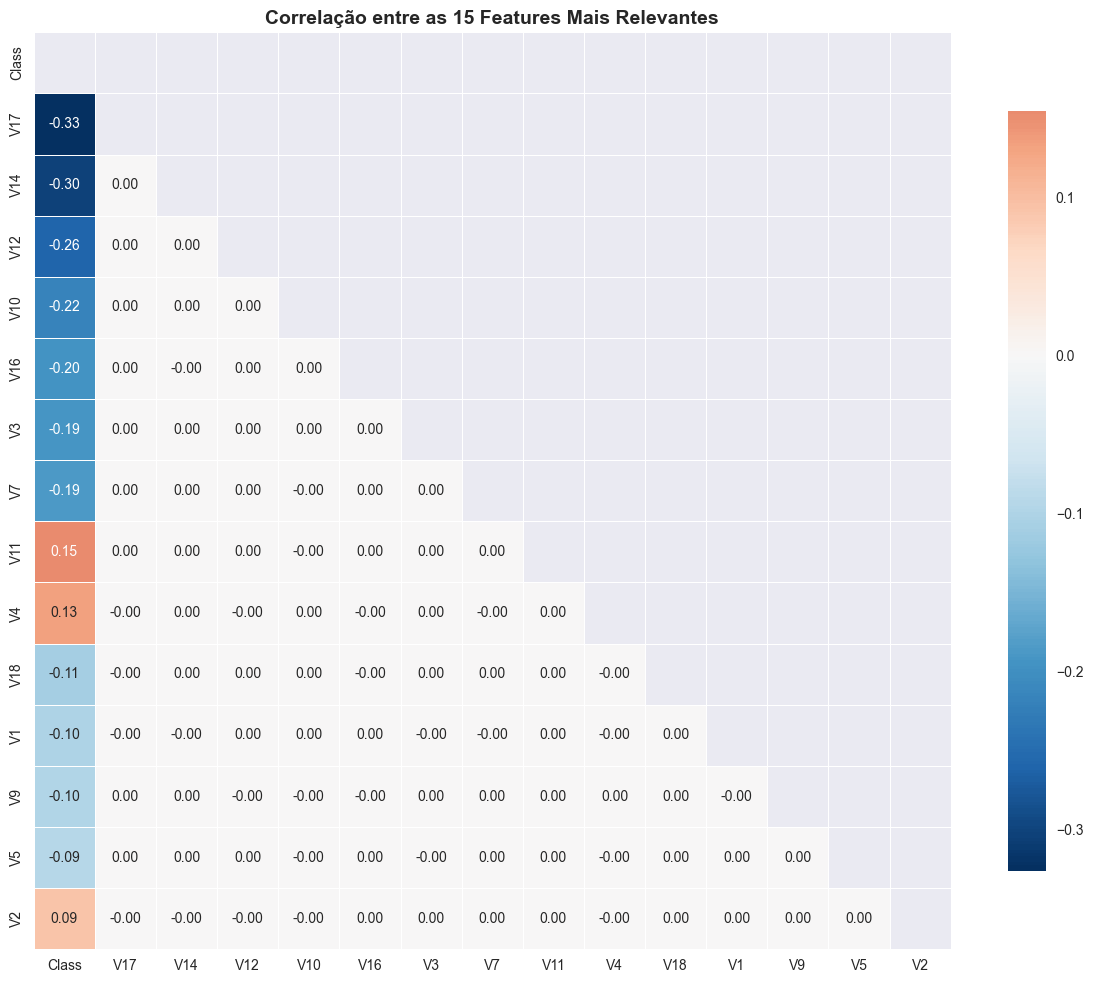

📊 ANÁLISE DE MULTICOLINEARIDADE:
✅ Nenhuma multicolinearidade crítica detectada


In [31]:
# Heatmap focado nas features mais importantes
print("🔥 HEATMAP DAS FEATURES MAIS RELEVANTES")

# Selecionar features mais correlacionadas com Class
top_features = target_correlation.abs().nlargest(15).index
correlation_top = df[top_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_top, dtype=bool))
sns.heatmap(correlation_top, mask=mask, cmap='RdBu_r', center=0,
            square=True, annot=True, fmt=".2f", linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Correlação entre as 15 Features Mais Relevantes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Análise de multicolinearidade
print("📊 ANÁLISE DE MULTICOLINEARIDADE:")
high_corr_pairs = []
for i in range(len(correlation_top.columns)):
    for j in range(i+1, len(correlation_top.columns)):
        if abs(correlation_top.iloc[i, j]) > 0.75 and i != j:
            high_corr_pairs.append((
                correlation_top.columns[i], 
                correlation_top.columns[j], 
                correlation_top.iloc[i, j]
            ))

if high_corr_pairs:
    print("🚨 Pares com alta correlação (possível multicolinearidade):")
    for pair in high_corr_pairs[:5]:  # Mostrar apenas os 5 primeiros
        print(f"   • {pair[0]} vs {pair[1]}: {pair[2]:.3f}")
else:
    print("✅ Nenhuma multicolinearidade crítica detectada")

## 7. 🎭 Distribuição das Features V1-V28


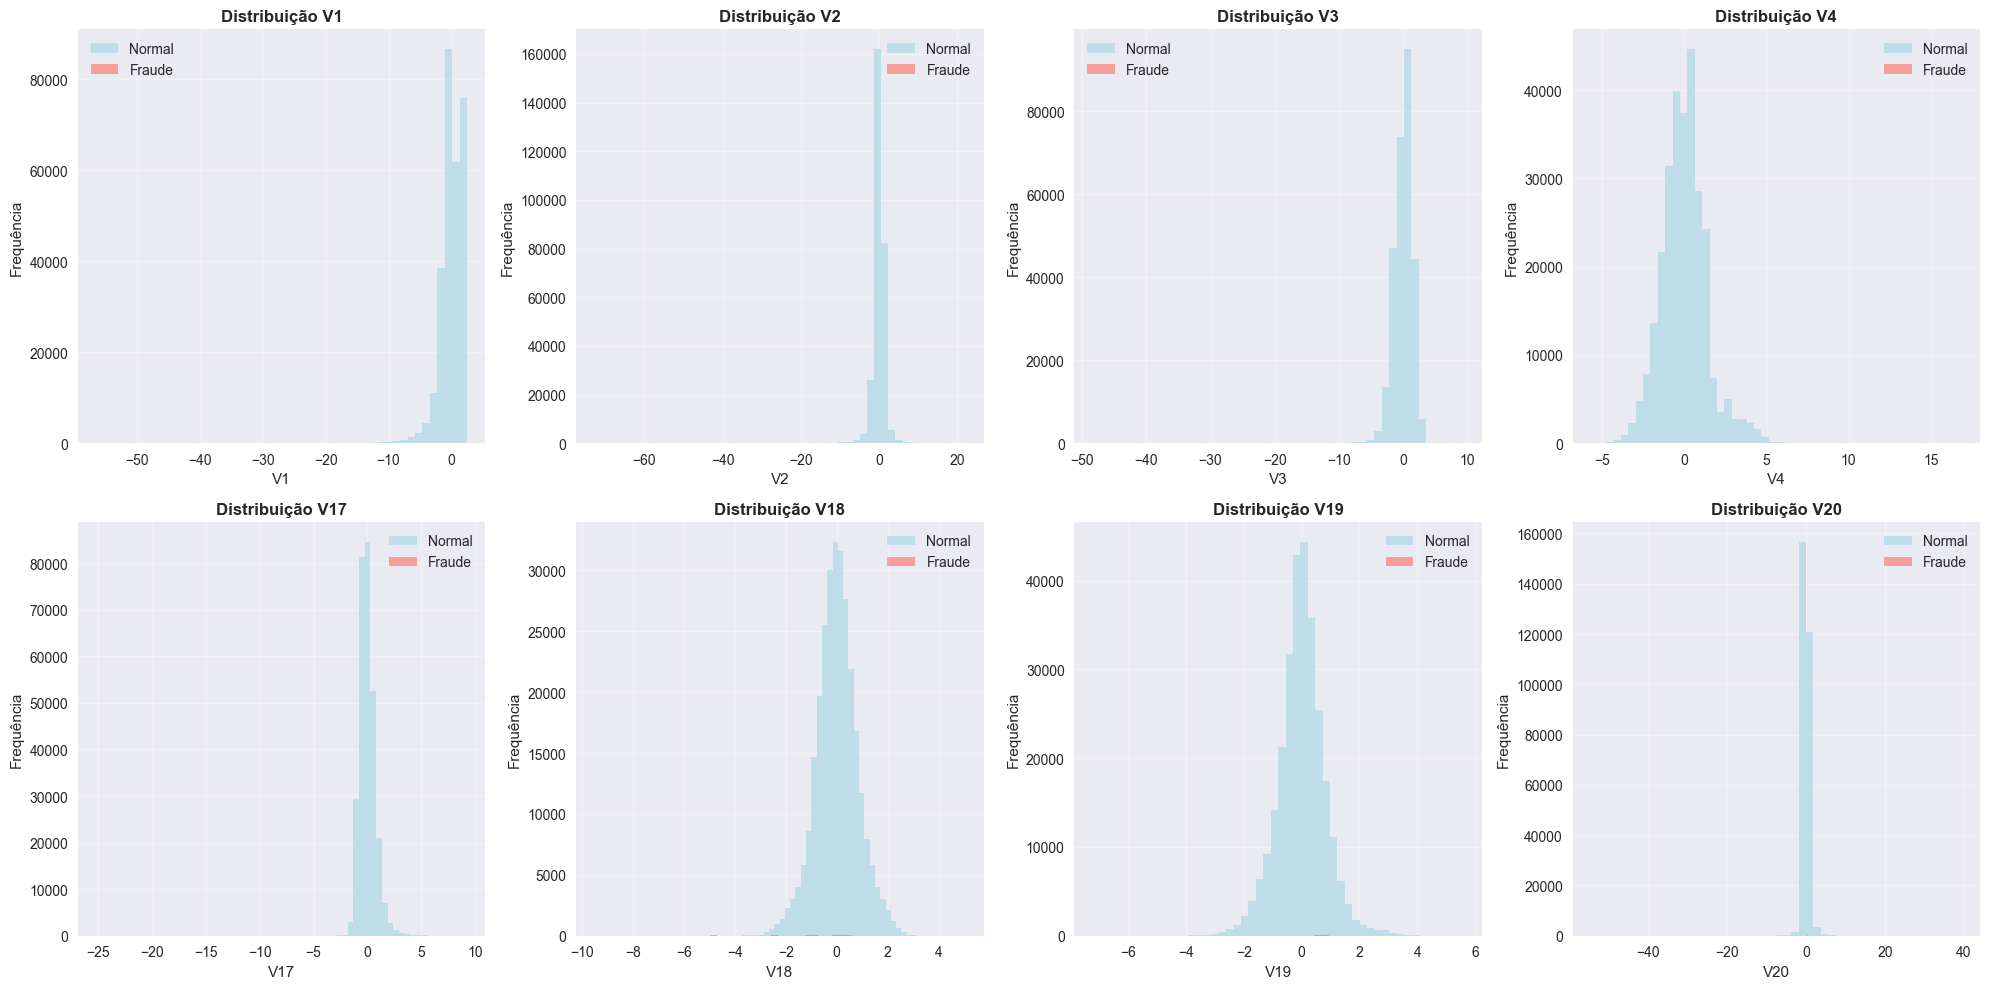

In [20]:
# Selecionar algumas features V para análise
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V17', 'V18', 'V19', 'V20']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    # Plot distribuição por classe
    axes[i].hist(df[df['Class'] == 0][feature], bins=50, alpha=0.7, label='Normal', color='lightblue')
    axes[i].hist(df[df['Class'] == 1][feature], bins=50, alpha=0.7, label='Fraude', color='salmon')
    axes[i].set_title(f'Distribuição {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequência')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. 📉 Análise de Outliers


📊 Análise de Outliers no Amount:
• Limite inferior: -101.75
• Limite superior: 184.51
• Total de outliers: 31,904
• Outliers fraudulentos: 91
• Percentual de fraudes entre outliers: 0.29%


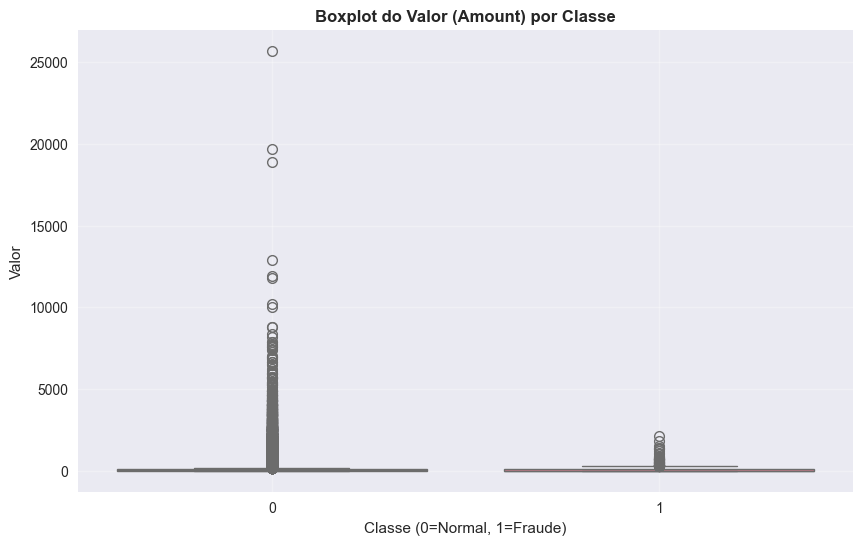

In [21]:
# Análise de outliers usando IQR para Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_amount = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
outliers_fraud = outliers_amount[outliers_amount['Class'] == 1]

print("📊 Análise de Outliers no Amount:")
print(f"• Limite inferior: {lower_bound:.2f}")
print(f"• Limite superior: {upper_bound:.2f}")
print(f"• Total de outliers: {len(outliers_amount):,}")
print(f"• Outliers fraudulentos: {len(outliers_fraud):,}")
print(f"• Percentual de fraudes entre outliers: {(len(outliers_fraud)/len(outliers_amount))*100:.2f}%")
# Boxplot do Amount por classe
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot do Valor (Amount) por Classe', fontweight='bold')
plt.xlabel('Classe (0=Normal, 1=Fraude)')
plt.ylabel('Valor')
plt.grid(alpha=0.3)
plt.show()

📊 ANÁLISE MULTIVARIADA DE OUTLIERS
• Outliers detectados pelo Isolation Forest: 2849
• Fraudess capturadas como outliers: 131
• Eficiência na detecção de fraudes: 26.6%


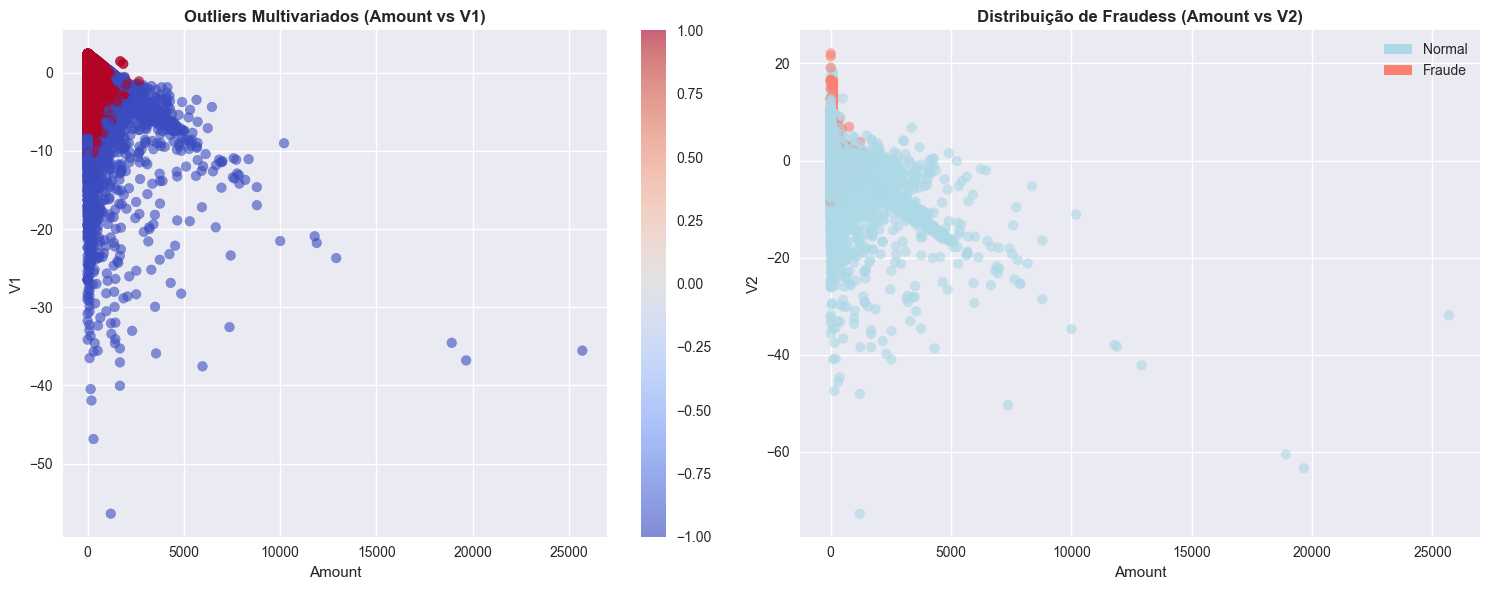

In [30]:
# Análise multivariada de outliers
print("📊 ANÁLISE MULTIVARIADA DE OUTLIERS")

from sklearn.ensemble import IsolationForest

# Usar Isolation Forest para detectar outliers multivariados
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_labels = iso_forest.fit_predict(df[['Amount', 'V1', 'V2', 'V3']])

# Analisar relação entre outliers do Isolation Forest e fraudes
df_temp = df.copy()
df_temp['ISO_Outlier'] = outlier_labels
iso_fraudes = df_temp[(df_temp['ISO_Outlier'] == -1) & (df_temp['Class'] == 1)]

print(f"• Outliers detectados pelo Isolation Forest: {(outlier_labels == -1).sum()}")
print(f"• Fraudess capturadas como outliers: {iso_fraudes.shape[0]}")
print(f"• Eficiência na detecção de fraudes: {(iso_fraudes.shape[0]/df[df['Class']==1].shape[0])*100:.1f}%")

# Visualização de outliers multivariados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Outliers vs Amount
scatter = ax1.scatter(df['Amount'], df['V1'], c=outlier_labels, cmap='coolwarm', alpha=0.6)
ax1.set_title('Outliers Multivariados (Amount vs V1)', fontweight='bold')
ax1.set_xlabel('Amount')
ax1.set_ylabel('V1')
plt.colorbar(scatter, ax=ax1)

# Fraudes vs Outliers
colors = ['lightblue' if x == 0 else 'salmon' for x in df['Class']]
ax2.scatter(df['Amount'], df['V2'], c=colors, alpha=0.6)
ax2.set_title('Distribuição de Fraudess (Amount vs V2)', fontweight='bold')
ax2.set_xlabel('Amount')
ax2.set_ylabel('V2')

# Adicionar legenda manualmente
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label='Normal'),
    Patch(facecolor='salmon', label='Fraude')
]
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.show()